In [ ]:
##DOWNLOADING DATA FROM DRIVE
import glob
import os
import sys
import gdown
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("dir/LensFinding")
print("Changed directory to:", os.getcwd())


Changed directory to: /content/drive/MyDrive/Hari/Evaluation/LensFinding


In [ ]:
file_id = "1doUhVoq1-c9pamZVLpvjW1YRDMkKO1Q5"

path = "./data/dataset.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1doUhVoq1-c9pamZVLpvjW1YRDMkKO1Q5
From (redirected): https://drive.google.com/uc?id=1doUhVoq1-c9pamZVLpvjW1YRDMkKO1Q5&confirm=t&uuid=b925853a-af9c-4297-8615-c6c5f67920d0
To: /content/drive/MyDrive/Hari/Evaluation/Lens Finding/data/dataset.zip
100%|██████████| 2.11G/2.11G [00:32<00:00, 65.1MB/s]


'./data/dataset.zip'

In [ ]:
!unzip "./data/dataset.zip" -d "./data/"

Streaming output truncated to the last 5000 lines.
  inflating: ./data/test_nonlenses/17760.npy  
  inflating: ./data/__MACOSX/test_nonlenses/._17760.npy  
  inflating: ./data/test_nonlenses/18453.npy  
  inflating: ./data/__MACOSX/test_nonlenses/._18453.npy  
  inflating: ./data/test_nonlenses/5227.npy  
  inflating: ./data/__MACOSX/test_nonlenses/._5227.npy  
  inflating: ./data/test_nonlenses/4139.npy  
  inflating: ./data/__MACOSX/test_nonlenses/._4139.npy  
  inflating: ./data/test_nonlenses/3656.npy  
  inflating: ./data/__MACOSX/test_nonlenses/._3656.npy  
  inflating: ./data/test_nonlenses/11311.npy  
  inflating: ./data/__MACOSX/test_nonlenses/._11311.npy  
  inflating: ./data/test_nonlenses/3130.npy  
  inflating: ./data/__MACOSX/test_nonlenses/._3130.npy  
  inflating: ./data/test_nonlenses/11477.npy  
  inflating: ./data/__MACOSX/test_nonlenses/._11477.npy  
  inflating: ./data/test_nonlenses/16318.npy  
  inflating: ./data/__MACOSX/test_nonlenses/._16318.npy  
  inflating:

In [ ]:
os.chdir("dir/LensFinding/data")
print("Changed directory to:", os.getcwd())  # Verify the change

Changed directory to: /content/drive/MyDrive/Hari/Evaluation/LensFinding/data


In [ ]:
!ls


dataset.zip  __MACOSX  test_lenses  test_nonlenses  train_lenses  train_nonlenses


In [ ]:
!ls -lha "dir/LensFinding/data"

total 2.0G
-rw------- 1 root root 2.0G Feb 26 17:16 dataset.zip
drwx------ 6 root root 4.0K Mar 25 09:17 __MACOSX
drwx------ 2 root root 4.0K Feb 26 17:09 test_lenses
drwx------ 2 root root 4.0K Feb 26 17:09 test_nonlenses
drwx------ 2 root root 4.0K Feb 26 17:09 train_lenses
drwx------ 2 root root 4.0K Feb 26 17:09 train_nonlenses


In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# path
path = "dir/LensFinding/data/"

# Listing classes to verify
classes = sorted(os.listdir(path))
print(f"Classes: {classes}")

# Loading a sample image
sample_class = classes[2]  # First class
sample_file = os.listdir(os.path.join(path, sample_class))[0]  # First image
sample_path = os.path.join(path, sample_class, sample_file)

# Load the .npy image
image = np.load(sample_path)
print(f"Image shape: {image.shape}")

Classes: ['test_data.npz', 'test_lenses', 'test_nonlenses', 'train_data.npz', 'train_lenses', 'train_nonlenses']
Image shape: (3, 64, 64)


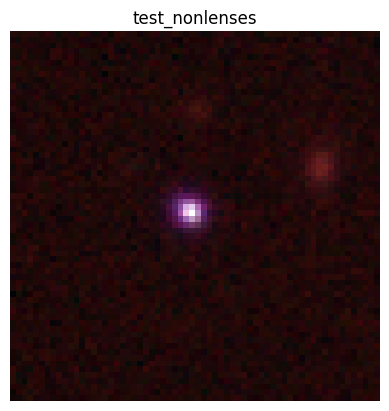

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def show_image(image_path, title=""):
    image = np.load(image_path)  # Load the .npy image
    image = np.transpose(image,(1,2,0))  #dim (1, 150, 150) → (150, 150)

    #plt.imshow(image, cmap="gray")  # Use grayscale colormap
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Example Image from the first class
import os

train_path = "dir/LensFinding/data/"
classes = sorted(os.listdir(train_path))
sample_class = classes[1]  # first class
sample_file = os.listdir(os.path.join(train_path, sample_class))[10000]  # Pick first image
sample_path = os.path.join(train_path, sample_class, sample_file)
show_image(sample_path, title=sample_class)

In [ ]:
import sys
sys.path.append("./src")

In [ ]:
from npy_to_npz import create_lens_npz

In [ ]:
data_root = "dir/LensFinding/data/"

# Saving train data (train_lenses + train_nonlenses)
create_lens_npz(data_root, "train_data.npz", folders=["train_lenses", "train_nonlenses"])

# Saving test data (test_lenses + test_nonlenses)
create_lens_npz(data_root, "test_data.npz", folders=["test_lenses", "test_nonlenses"])


Loading train_nonlenses: 100%|██████████| 28675/28675 [16:27<00:00, 29.04it/s] 


Saved dataset to train_data.npz, shape: (30405, 3, 64, 64)


Loading test_nonlenses: 100%|██████████| 19455/19455 [11:14<00:00, 28.85it/s] 


Saved dataset to test_data.npz, shape: (19650, 3, 64, 64)


In [ ]:
import numpy as np

# Loading the train dataset
train_data = np.load("dir/LensFinding/data/train_data.npz")
train_images, train_labels = train_data["images"], train_data["labels"]

# Loading the test dataset
test_data = np.load("dir/LensFinding/data/test_data.npz")
test_images, test_labels = test_data["images"], test_data["labels"]

print(f"Train set: {train_images.shape}, Labels: {train_labels.shape}")
print(f"Test set: {test_images.shape}, Labels: {test_labels.shape}")


Train set: (30405, 3, 64, 64), Labels: (30405,)
Test set: (19650, 3, 64, 64), Labels: (19650,)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Convert to PyTorch tensors
train_images_tensor = torch.tensor(train_images, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)

test_images_tensor = torch.tensor(test_images, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

# Create TensorDataset
train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)

# Create DataLoaders
batch_size = 200  # Adjust as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Check a batch
for images, labels in train_loader:
    print(f"Batch shape: {images.shape}, Labels shape: {labels.shape}")
    break


Batch shape: torch.Size([200, 3, 64, 64]), Labels shape: torch.Size([200])


In [ ]:
num = 0
for i in range(len(train_dataset)):
  if train_labels[i] == torch.tensor(0, dtype=torch.long):
    num += 1
print(num)

28675


In [ ]:
for i in range(len(train_dataset)):
  if train_labels[i] == torch.tensor(0, dtype=torch.long):
    print(train_images[i].shape)
    plt.imshow(train_images[i].transpose(1, 2, 0))
    plt.show()

Output hidden; open in https://colab.research.google.com to view.